In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore") # Ignore warnings for cleaner output

In [122]:
df = pd.read_csv('insurance.csv')   
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

EDA - Exploratpry data anal.

In [123]:
df.shape

(1338, 7)

In [124]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [127]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

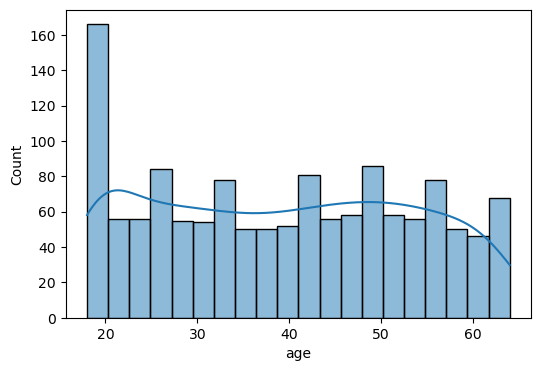

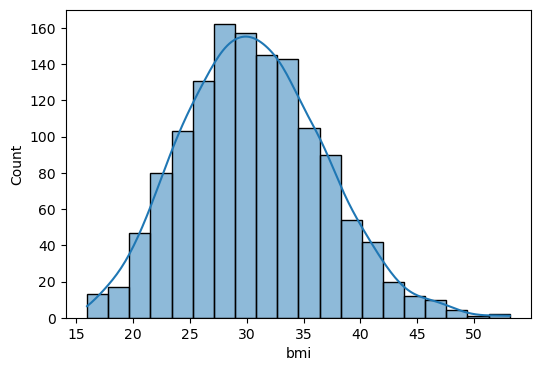

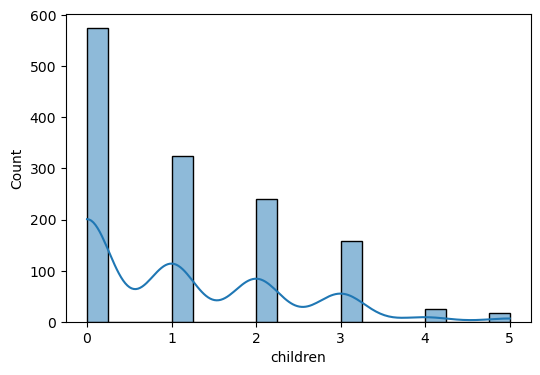

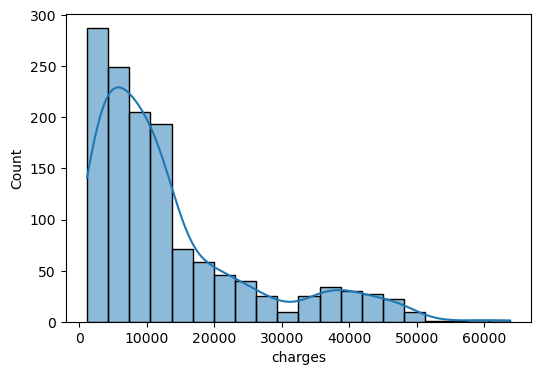

In [129]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col], kde = True, bins = 20) #Kernal density estimation

<Axes: xlabel='children', ylabel='count'>

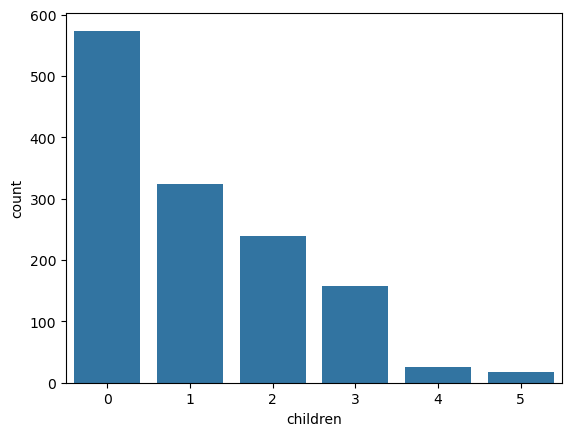

In [130]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

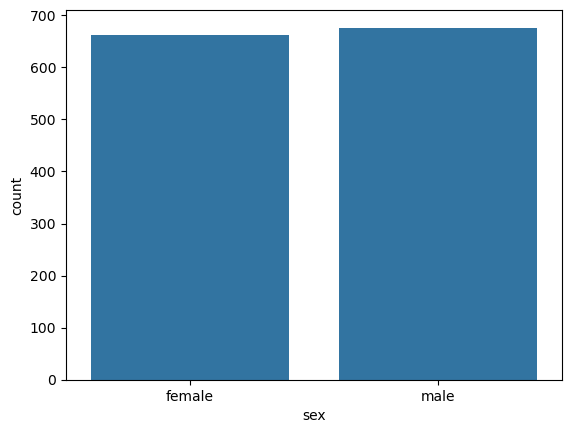

In [131]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

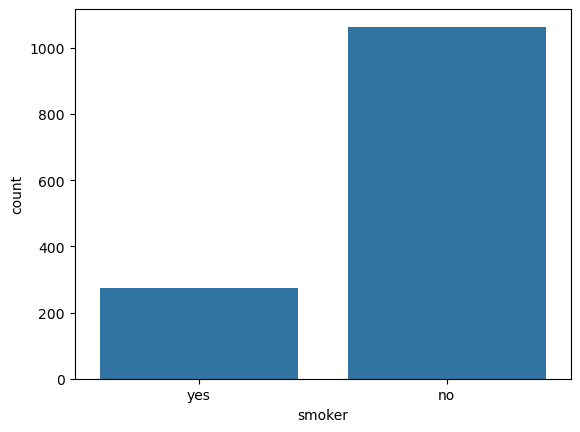

In [132]:
sns.countplot(x = df['smoker'])

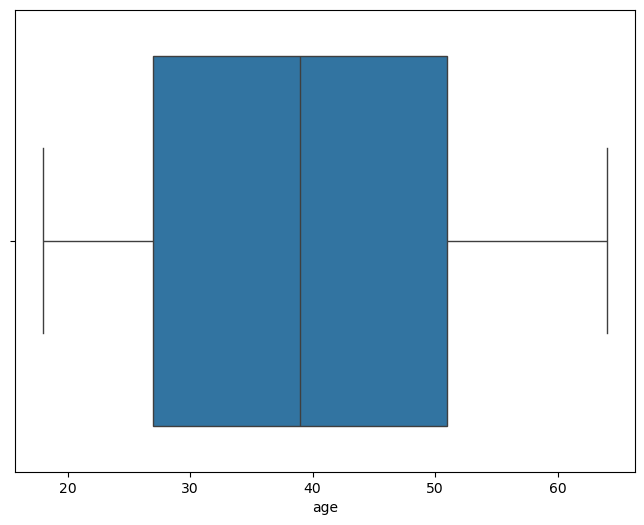

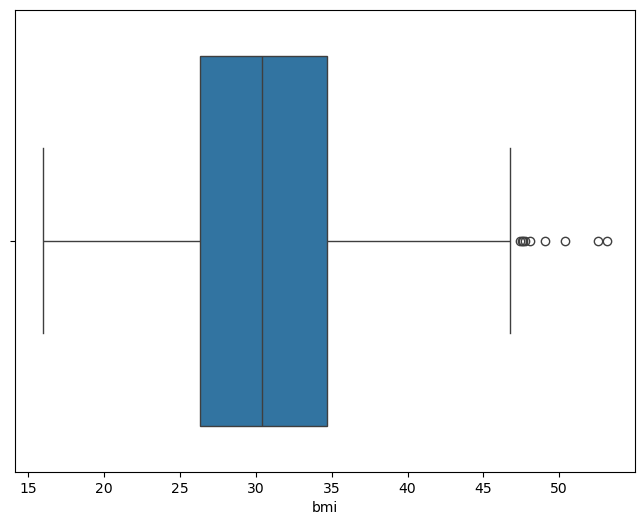

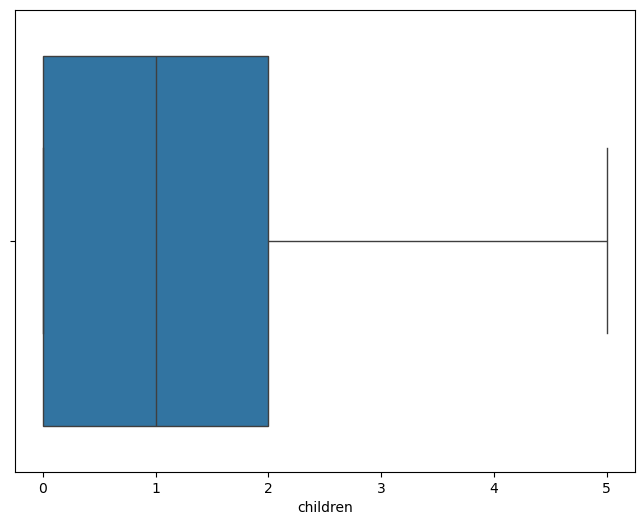

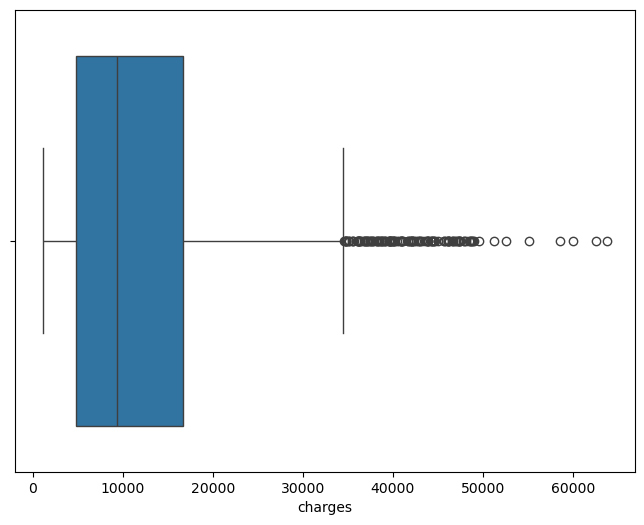

In [133]:
for col in numeric_columns:
    plt.figure(figsize = (8,6))
    sns.boxplot(x = df[col])

<Axes: >

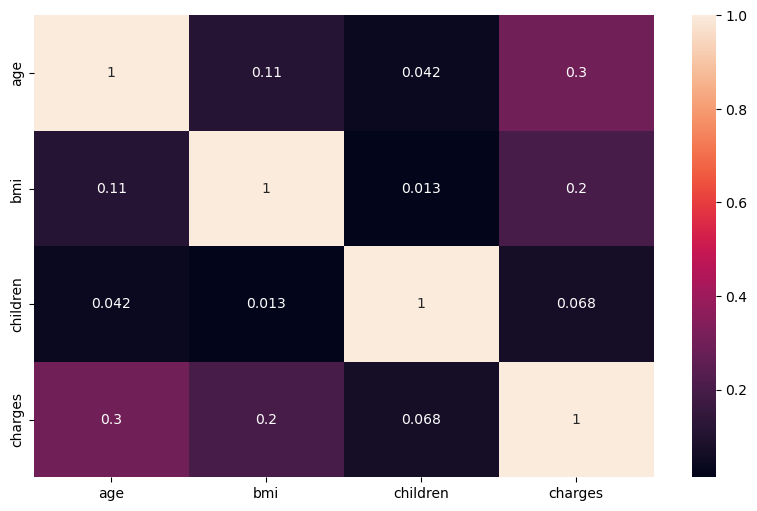

In [134]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

Data cleaning / processing

In [135]:
df_cleaned = df.copy()
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [136]:
df.shape

(1338, 7)

In [137]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [138]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male' : 0 , 'female' : 1})
df_cleaned.head()

age  sex     bmi  children smoker     region      charges
0   19    1  27.900         0    yes  southwest  16884.92400
1   18    0  33.770         1     no  southeast   1725.55230
2   28    0  33.000         3     no  southeast   4449.46200
3   33    0  22.705         0     no  northwest  21984.47061
4   32    0  28.880         0     no  northwest   3866.85520

In [140]:
df_cleaned.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [141]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [142]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no' : 0 , 'yes' : 1})
df_cleaned.head()

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520

In [143]:
df_cleaned.rename(columns = {
    'sex':'is_female',
    'smoker':'is_smoker'
}, inplace=True)
        

df_cleaned.head()

age  is_female     bmi  children  is_smoker     region      charges
0   19          1  27.900         0          1  southwest  16884.92400
1   18          0  33.770         1          0  southeast   1725.55230
2   28          0  33.000         3          0  southeast   4449.46200
3   33          0  22.705         0          0  northwest  21984.47061
4   32          0  28.880         0          0  northwest   3866.85520

In [144]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [145]:
df_cleaned= pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)
df_cleaned.head()

age  is_female     bmi  children  is_smoker      charges  region_northwest  \
0   19          1  27.900         0          1  16884.92400             False   
1   18          0  33.770         1          0   1725.55230             False   
2   28          0  33.000         3          0   4449.46200             False   
3   33          0  22.705         0          0  21984.47061              True   
4   32          0  28.880         0          0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [146]:
df_cleaned.astype(int)

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 9 columns]

Feature ENGG and extraction

<Axes: xlabel='bmi', ylabel='Count'>

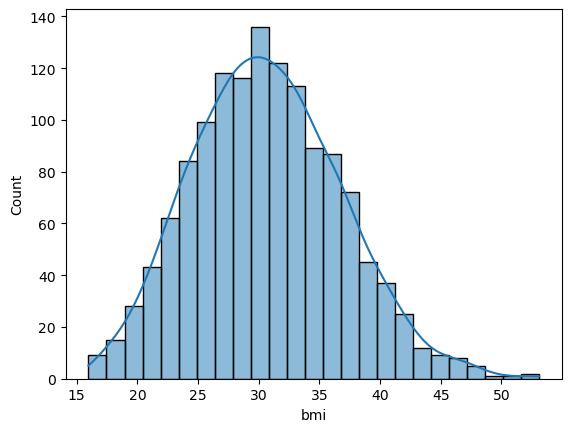

In [147]:
sns.histplot(df['bmi'], kde = True)

In [148]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'], 
    bins=[0, 18.5, 24.9, 29.9, np.inf], 
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
df_cleaned

age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          1  16884.92400   
1      18          0  33.770         1          0   1725.55230   
2      28          0  33.000         3          0   4449.46200   
3      33          0  22.705         0          0  21984.47061   
4      32          0  28.880         0          0   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          0  10600.54830   
1334   18          1  31.920         0          0   2205.98080   
1335   18          1  36.850         0          0   1629.83350   
1336   21          1  25.800         0          0   2007.94500   
1337   61          1  29.070         0          1  29141.36030   

      region_northwest  region_southeast  region_southwest bmi_category  
0                False             False              True   Overweight  
1                False              True             False        Obese  
2                False              True             False        Obese  
3                 True             False             False       Normal  
4                 True             False             False   Overweight  
...                ...               ...               ...          ...  
1333              True             False             False        Obese  
1334             False             False             False        Obese  
1335             False              True             False        Obese  
1336             False             False              True   Overweight  
1337              True             False             False   Overweight  

[1337 rows x 10 columns]

In [149]:
df_cleaned= pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)
df_cleaned.head()

age  is_female     bmi  children  is_smoker      charges  region_northwest  \
0   19          1  27.900         0          1  16884.92400             False   
1   18          0  33.770         1          0   1725.55230             False   
2   28          0  33.000         3          0   4449.46200             False   
3   33          0  22.705         0          0  21984.47061              True   
4   32          0  28.880         0          0   3866.85520              True   

   region_southeast  region_southwest  bmi_category_Normal  \
0             False              True                False   
1              True             False                False   
2              True             False                False   
3             False             False                 True   
4             False             False                False   

   bmi_category_Overweight  bmi_category_Obese  
0                     True               False  
1                    False                True  
2                    False                True  
3                    False               False  
4                     True               False

In [150]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

age  is_female  bmi  children  is_smoker  charges  region_northwest  \
0      19          1   27         0          1    16884                 0   
1      18          0   33         1          0     1725                 0   
2      28          0   33         3          0     4449                 0   
3      33          0   22         0          0    21984                 1   
4      32          0   28         0          0     3866                 1   
...   ...        ...  ...       ...        ...      ...               ...   
1333   50          0   30         3          0    10600                 1   
1334   18          1   31         0          0     2205                 0   
1335   18          1   36         0          0     1629                 0   
1336   21          1   25         0          0     2007                 0   
1337   61          1   29         0          1    29141                 1   

      region_southeast  region_southwest  bmi_category_Normal  \
0                    0                 1                    0   
1                    1                 0                    0   
2                    1                 0                    0   
3                    0                 0                    1   
4                    0                 0                    0   
...                ...               ...                  ...   
1333                 0                 0                    0   
1334                 0                 0                    0   
1335                 1                 0                    0   
1336                 0                 1                    0   
1337                 0                 0                    0   

      bmi_category_Overweight  bmi_category_Obese  
0                           1                   0  
1                           0                   1  
2                           0                   1  
3                           0                   0  
4                           1                   0  
...                       ...                 ...  
1333                        0                   1  
1334                        0                   1  
1335                        0                   1  
1336                        1                   0  
1337                        1                   0  

[1337 rows x 12 columns]

In [151]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [152]:
# SCaling
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
df_cleaned.head()

age  is_female       bmi  children  is_smoker  charges  \
0 -1.440418          1 -0.517949 -0.909234          1    16884   
1 -1.511647          0  0.462463 -0.079442          0     1725   
2 -0.799350          0  0.462463  1.580143          0     4449   
3 -0.443201          0 -1.334960 -0.909234          0    21984   
4 -0.514431          0 -0.354547 -0.909234          0     3866   

   region_northwest  region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 0                 1                    0   
1                 0                 1                 0                    0   
2                 0                 1                 0                    0   
3                 1                 0                 0                    1   
4                 1                 0                 0                    0   

   bmi_category_Overweight  bmi_category_Obese  
0                        1                   0  
1                        0                   1  
2                        0                   1  
3                        0                   0  
4                        1                   0

In [153]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [154]:
from scipy.stats import pearsonr
# Pearson correlation can be calculated as follows:
selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

Feature  Pearson Correlation
5                   charges             1.000000
4                 is_smoker             0.787234
0                       age             0.298309
11       bmi_category_Obese             0.197660
2                       bmi             0.196236
7          region_southeast             0.073577
3                  children             0.067390
6          region_northwest            -0.038695
8          region_southwest            -0.043637
1                 is_female            -0.058046
9       bmi_category_Normal            -0.105656
10  bmi_category_Overweight            -0.118280

In [155]:
cat_features = ['is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']

In [156]:
from scipy.stats import chi2_contingency
import pandas as pd
alpha = 0.05
df_cleaned['charges_bins'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_bins'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    decision = 'Reject H0' if p < alpha else 'Fail to Reject H0'
    chi2_results[col] = {
        'chi2': chi2,
        'p_value': p,
        'decision': decision
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

chi2   p_value           decision
is_smoker                848.219178       0.0          Reject H0
region_southeast          15.998167  0.001135          Reject H0
is_female                 10.258784   0.01649          Reject H0
bmi_category_Obese         7.654464   0.05372  Fail to Reject H0
region_southwest           5.091893  0.165191  Fail to Reject H0
bmi_category_Normal        4.263673  0.234364  Fail to Reject H0
bmi_category_Overweight    4.201575  0.240504  Fail to Reject H0
region_northwest            1.13424  0.768815  Fail to Reject H0

In [157]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker','charges',
       'region_northwest', 'region_southeast', 'region_southwest',]]
final_df

age  is_female       bmi  children  is_smoker  charges  \
0    -1.440418          1 -0.517949 -0.909234          1    16884   
1    -1.511647          0  0.462463 -0.079442          0     1725   
2    -0.799350          0  0.462463  1.580143          0     4449   
3    -0.443201          0 -1.334960 -0.909234          0    21984   
4    -0.514431          0 -0.354547 -0.909234          0     3866   
...        ...        ...       ...       ...        ...      ...   
1333  0.767704          0 -0.027743  1.580143          0    10600   
1334 -1.511647          1  0.135659 -0.909234          0     2205   
1335 -1.511647          1  0.952670 -0.909234          0     1629   
1336 -1.297958          1 -0.844753 -0.909234          0     2007   
1337  1.551231          1 -0.191145 -0.909234          1    29141   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1337 rows x 9 columns]

In [158]:
from sklearn.model_selection import train_test_split
x = final_df.drop('charges', axis=1)
y = final_df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [163]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2
n = x_test.shape[0]
p = x_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.8009804350009149